In [4]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

## Simulation of differential scanning calorimetry (DSC)

Underlying model:

\begin{align}
 \frac{dA}{dt} &= - k_0 e^{-\frac{E_a}{R}\left(\frac{1}{T}-\frac{1}{T_{ref}}\right)} \cdot A(t), \\
\end{align}

* $A(t)$ ... Enzyme amount (e.g., in mmol)
* $T$ ... Temperature
* $R$ ... universal gas costant (8.314 J/mol)
* $E_a, k_0, T_{ref}$ ... constants

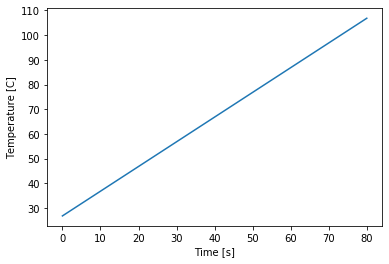

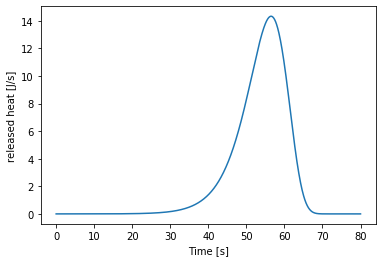

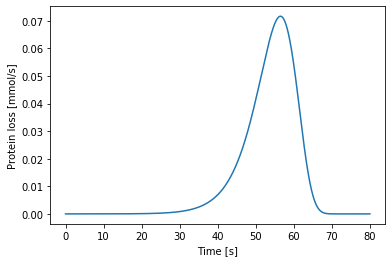

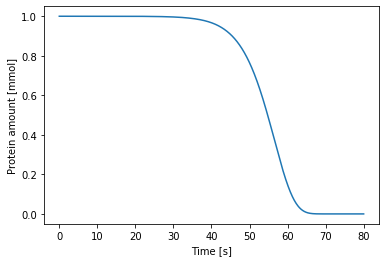

In [150]:
# define ODE for DSC (diff. scanning calorimetry) example
k0 = .1 # Arrhenius prefactor (at T=T_ref)
T_ref = 273.15+80 # reference temp. for k0
E_a = 200 # activation energy in kJ/mol
R = 8.314e-3 # gas constant in kJ/mol
T_max = 80 # max. simulation time in sec
ramp = 1 # temp. rate in K/s
protein_init = 1 # mmol

def T(t): # temperature in K at given time t
    return 300 + ramp*t

def rhs_DSC(t, y):
    [P] = y # state var: enyme Activity
    r = k0* np.exp(-E_a/R*(1/T(t)-1/T_ref))
    dPdt = - r*P
    return [dPdt]

sol_DSC = solve_ivp(rhs_DSC, [0,T_max], [protein_init], t_eval=np.linspace(0,T_max,1001))

protein = sol_DSC.y.T # activity
time = sol_DSC.t

protein_loss = np.array([- rhs_DSC(t, P)[0]  for (t,P) in zip(time, protein)])
heat = E_a * protein_loss

plt.plot(time, T(time)-273.15)
plt.xlabel('Time [s]')
plt.ylabel('Temperature [C]')
plt.show()

plt.plot(time, heat)
plt.xlabel('Time [s]')
plt.ylabel('released heat [J/s]')
plt.show()

plt.plot(time, protein_loss)
plt.xlabel('Time [s]')
plt.ylabel('Protein loss [mmol/s]')
plt.show()

plt.plot(time, protein)
plt.xlabel('Time [s]')
plt.ylabel('Protein amount [mmol]')
plt.show()
